### Testing light curve utils module

<br>**Author(s):** Weixiang Yu
<br>**Last run:** 07-15-20
<br>**Short description:** The notebook hosts code to develope the `lc.utils` module 

In [1]:
# import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, sys

# see if local stores mpl style, else use from src
try:
    plt.style.use('yu_basic')
except:
    mpl.rc_file('https://raw.githubusercontent.com/ywx649999311/project_template'
                '/master/%7B%7Bcookiecutter.project_name%7D%7D/src/vis/mpl/yu_basic.rc')

pd.set_option('display.max_columns', 999)
%matplotlib inline

In [2]:
# import kali
import kali.carma

### 1. Seasonal Gap function
A function for introducing seasonal gaps into light curves

In [3]:
# simulate DRW using Kali
drw_task = kali.carma.CARMATask(1,0)
theta = np.array([1/100, 0.1])
drw_task.set(1.0, theta)
drw_lc = drw_task.simulate(duration=365.25*5)

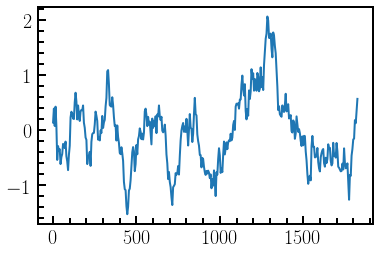

In [4]:
# plot original
plt.plot(drw_lc.t[::5], drw_lc.x[::5])

In [5]:
def add_season(t, lc_start=0, season_start=90, season_end=270):
    """Utility function to impose seasonal gap in mock light curves
    
    Args:
        t(array_like): Time stamp of observations in a light curve.
        lc_start(float): Light curve starting day within a year (0 -> 365.25). Default to 0.
        season_start(float): Observing season start day within a year. Default to 90.
        season_end(float): Observing season end day within a year. Default to 270.

    Returns:
        An mask of the original length to select data point.
    """
    
    t = t - t[0]
    t = t + lc_start
    
    mask = (np.mod(t, 365.25) > season_start ) & (np.mod(t, 365.25) < season_end)

    return mask

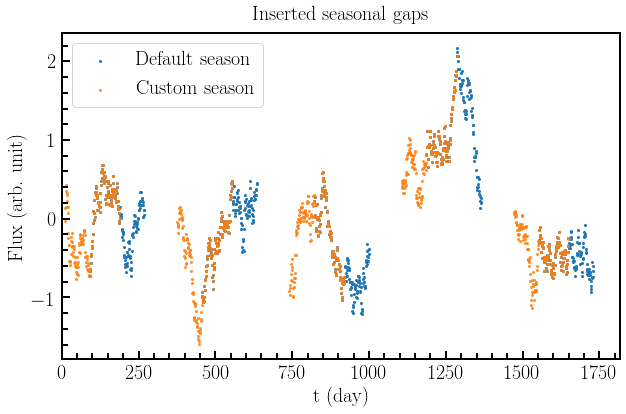

In [6]:
# plot lc with 6 month observing seasonal inserted
mask1 = add_season(drw_lc.t)
mask2 = add_season(drw_lc.t, season_start=10, season_end=190)
fig = plt.figure(figsize=(10,6))
plt.scatter(drw_lc.t[mask1], drw_lc.x[mask1], s=4, label='Default season')
plt.scatter(drw_lc.t[mask2], drw_lc.x[mask2], s=4, label='Custom season', alpha=0.8)
plt.xlabel('t (day)')
plt.ylabel('Flux (arb. unit)')
plt.xlim(left=0)
plt.title('Inserted seasonal gaps')
plt.legend()

### 1.2 Random downsample given the desired number of points (N)

In [58]:
def downsample_byN(t, nObs):
    """Utility function to randomly choose N observation from a given light curves
    
    Args:
        t(array_like): Time stamp of observations in the original light curve.
        N(int): The number of observations in the final light curve.

    Returns:
        An mask of the original length to select data point.
    """
    
    # random choose index
    idx = np.arange(len(t))
    mask = np.zeros_like(idx, dtype=np.bool)
    true_idx = np.random.choice(idx, nObs, replace=False)
    
    # assign chosen index to 1/True
    mask[true_idx] = 1
    
    return mask

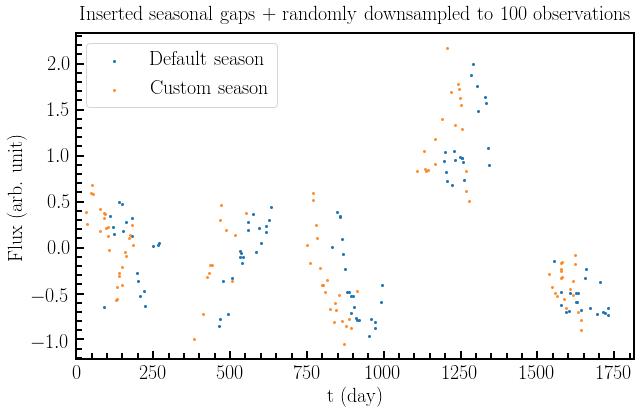

In [60]:
# grab t and y, assign to new variable
t = drw_lc.t
y = drw_lc.x

# get mask on top of first cut on seasonal gap
d_mask1 = downsample_byN(drw_lc.t[mask1], 100)
d_mask2 = downsample_byN(drw_lc.t[mask2], 100)

fig = plt.figure(figsize=(10,6))
plt.scatter(t[mask1][d_mask1], y[mask1][d_mask1], s=4, label='Default season')
plt.scatter(t[mask2][d_mask2], y[mask1][d_mask2], s=4, label='Custom season', alpha=0.8)
plt.xlabel('t (day)')
plt.ylabel('Flux (arb. unit)')
plt.xlim(left=0)
plt.title('Inserted seasonal gaps + randomly downsampled to 100 observations')
plt.legend()